## Package Loading

In [26]:
import FileOpener.new_backtest as newb
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
## 글씨체 바꿀 것(KB국민체)
mpl.rcParams["font.family"] = 'KBFG Text'
mpl.rcParams["font.size"] = 20
mpl.rcParams["figure.figsize"] = (14,7)

## 파일 로딩

In [7]:
dt = pd.read_csv('CSVFile/Price/Korea/Index/MKF_STYLE_SPEC.csv'
                 , encoding='cp949', index_col = 'Frequency')
dt.index = pd.to_datetime(dt.index)

In [10]:
bm = dt.loc[:,'MKF500']
style = dt.loc[:,'대형주':]

In [11]:
bm.head()

Frequency
2008-01-01    3792.19
2008-01-02    3710.29
2008-01-03    3710.37
2008-01-04    3730.23
2008-01-05    3730.23
Name: MKF500, dtype: float64

In [12]:
style.head()

,대형주,중형주,소형주,대형순수가치,대형순수성장,중형순수가치,중형순수성장,소형순수가치,소형순수성장
Frequency,,,,,,,,,
2008-01-01,3802.94,5151.65,2340.03,9498.55,4283.64,16166.85,2189.05,20448.25,1446.44
2008-01-02,3716.74,5030.74,2332.79,9244.79,4184.43,15678.72,2117.70,20242.21,1436.76
2008-01-03,3712.57,5077.84,2339.53,9221.93,4174.90,15779.31,2147.34,20179.66,1440.01
2008-01-04,3730.46,5111.63,2365.51,9284.89,4210.11,15783.25,2153.13,20253.28,1465.47
2008-01-05,3730.46,5111.63,2365.51,9284.89,4210.11,15783.25,2153.13,20253.28,1465.47


### 수익률 산출

In [13]:
def ret(index):
    
    return (index.pct_change().dropna(axis = 0, how = 'all')).sub(-1)

In [19]:
bm_rt = ret(bm)
style_rt = ret(style)
exc_style_rt = style_rt.sub(bm_rt, axis = 0).sub(-1)

### 분석 준비 / 상위 / 하위

In [30]:
upper_style = ['대형주', '중형주', '소형주']
lower_style_value = ['대형순수가치', '중형순수가치', '소형순수가치']
lower_style_growth = ['대형순수성장', '중형순수성장', '소형순수성장']
lower_style = ['대형순수가치', '대형순수성장', '중형순수가치', '중형순수성장', '소형순수가치', '소형순수성장']

## 대 / 중 / 소 수익률 분석

### 누적수익률

#### 대형/중형/소형

Text(0.5, 0, '')

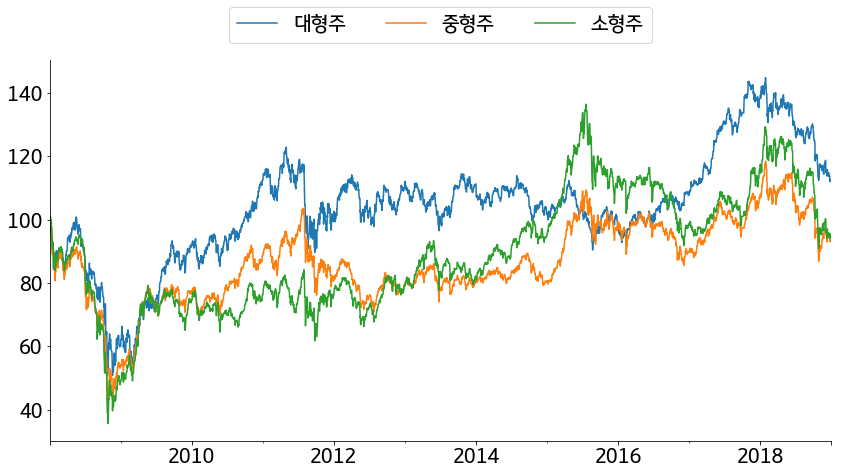

In [28]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

style_rt[upper_style].cumprod().div(1/100).plot(ax=ax)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), ncol = 5,loc = "lower center")
ax.set_xlabel(None)

#### 대형/중형/소형 가치

Text(0.5, 0, '')

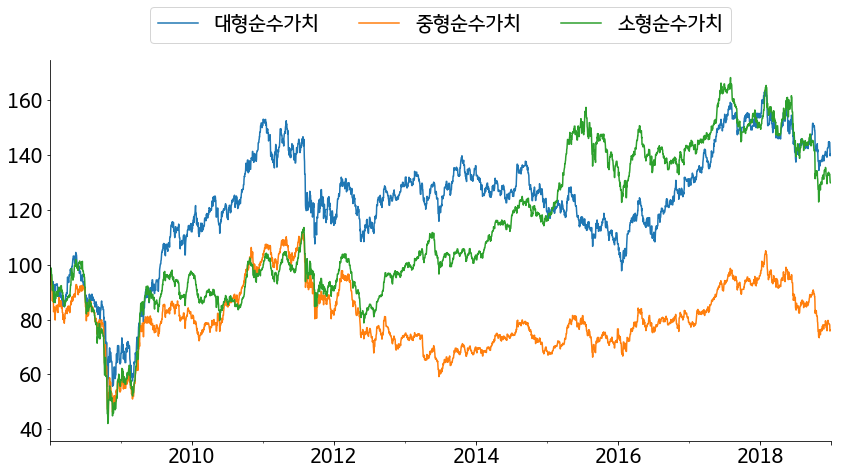

In [31]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

style_rt[lower_style_value].cumprod().div(1/100).plot(ax=ax)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), ncol = 5,loc = "lower center")
ax.set_xlabel(None)

#### 대형/중형/소형 성장

Text(0.5, 0, '')

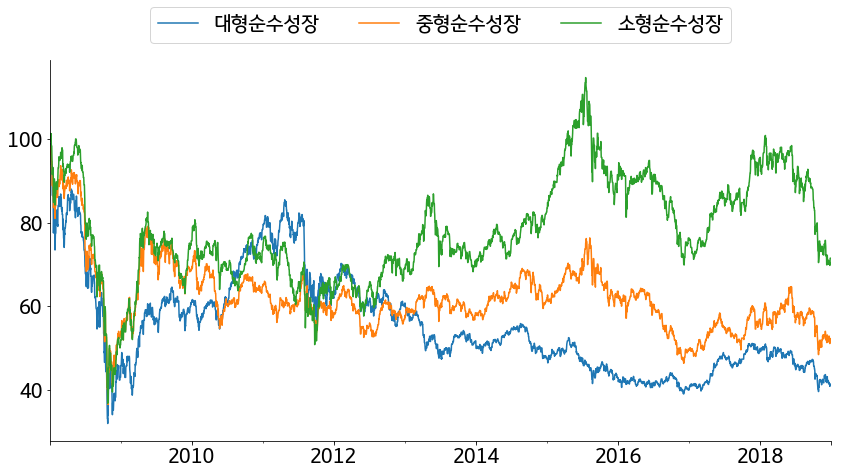

In [32]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

style_rt[lower_style_growth].cumprod().div(1/100).plot(ax=ax)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), ncol = 5,loc = "lower center")
ax.set_xlabel(None)

### 연간수익률

#### 대형 / 중형 / 소형

In [36]:
style_rt[upper_style].resample('A').prod().sub(1).applymap('{: .2%}'.format)

,대형주,중형주,소형주
Frequency,,,
2008-12-31,-39.91%,-45.97%,-51.35%
2009-12-31,52.97%,42.71%,53.27%
2010-12-31,22.32%,14.96%,2.21%
2011-12-31,-11.57%,-8.80%,-0.20%
2012-12-31,10.57%,-1.82%,4.01%
2013-12-31,1.20%,2.10%,3.90%
2014-12-31,-8.70%,-0.89%,15.40%
2015-12-31,-2.44%,23.72%,19.74%
2016-12-31,8.77%,-9.47%,-13.11%


#### 대형 / 중형 / 소형 가치

In [34]:
style_rt[lower_style_value].resample('A').prod().sub(1).applymap('{: .2%}'.format)

,대형순수가치,중형순수가치,소형순수가치
Frequency,,,
2008-12-31,-35.76%,-46.00%,-42.92%
2009-12-31,74.37%,48.88%,69.89%
2010-12-31,34.59%,27.60%,1.99%
2011-12-31,-23.53%,-19.50%,-8.26%
2012-12-31,11.61%,-10.04%,8.93%
2013-12-31,5.77%,-5.83%,4.70%
2014-12-31,-12.17%,-1.97%,11.99%
2015-12-31,-9.98%,11.67%,17.00%
2016-12-31,19.49%,3.17%,4.63%


#### 대형 / 중형 / 소형 성장

In [35]:
style_rt[lower_style_growth].resample('A').prod().sub(1).applymap('{: .2%}'.format)

,대형순수성장,중형순수성장,소형순수성장
Frequency,,,
2008-12-31,-56.96%,-46.74%,-49.25%
2009-12-31,41.56%,29.35%,49.01%
2010-12-31,28.59%,-6.06%,-3.09%
2011-12-31,-20.53%,-10.94%,-14.18%
2012-12-31,-3.64%,-1.23%,9.73%
2013-12-31,-13.78%,2.65%,2.91%
2014-12-31,-8.24%,5.29%,16.18%
2015-12-31,-9.53%,3.35%,10.83%
2016-12-31,-6.54%,-21.73%,-16.52%


### 상관관계

#### 월별 수익률 산출 후 상관관계 구하기


##### 2008.01.01 ~ 2008.12.31

In [63]:
import numpy as np

def monthly_return(index):
    
    index_ret = ret(index)
    month_index_ret = index_ret.resample('M').prod()
    
    return month_index_ret

def weekly_return(index):
    
    index_ret = ret(index)
    month_index_ret = index_ret.resample('M').prod()
    month_index_ret[month_index_ret == 1.0] = np.nan        
    
    return month_index_ret

#### 대형 / 중형 / 소형

In [64]:
(monthly_return(style_rt[upper_style]).corr()).applymap('{: .4f}'.format)

,대형주,중형주,소형주
대형주,1.0000,0.7022,0.6119
중형주,0.7022,1.0000,0.8670
소형주,0.6119,0.8670,1.0000


#### 대형 / 중형 / 소형 가치&성장

In [65]:
(monthly_return(style_rt[lower_style]).corr()).applymap('{: .4f}'.format)

,대형순수가치,대형순수성장,중형순수가치,중형순수성장,소형순수가치,소형순수성장
대형순수가치,1.0000,0.6875,0.7856,0.6401,0.6919,0.4439
대형순수성장,0.6875,1.0000,0.7563,0.8352,0.7578,0.7143
중형순수가치,0.7856,0.7563,1.0000,0.7543,0.7913,0.5392
중형순수성장,0.6401,0.8352,0.7543,1.0000,0.7699,0.8092
소형순수가치,0.6919,0.7578,0.7913,0.7699,1.0000,0.7015
소형순수성장,0.4439,0.7143,0.5392,0.8092,0.7015,1.0000


#### 대형 / 중형 / 소형 가치

In [66]:
(monthly_return(style_rt[lower_style_value]).corr()).applymap('{: .4f}'.format)

,대형순수가치,중형순수가치,소형순수가치
대형순수가치,1.0000,0.7856,0.6919
중형순수가치,0.7856,1.0000,0.7913
소형순수가치,0.6919,0.7913,1.0000


#### 대형 / 중형 / 소형 성장

In [67]:
(monthly_return(style_rt[lower_style_growth]).corr()).applymap('{: .4f}'.format)

,대형순수성장,중형순수성장,소형순수성장
대형순수성장,1.0000,0.8352,0.7143
중형순수성장,0.8352,1.0000,0.8092
소형순수성장,0.7143,0.8092,1.0000


## 상관관계 추이 산출

#### 1. 수익률: 2008.01.01~2018.12.31 간 월간수익률
#### 2. 5년간 Correlation 으로 계산 (Rolling 60)


#### 대형 순수가치 기준

In [68]:
lower_lar_p_val = '대형순수가치'
lower_style_ex_lar_pval = ['대형순수성장', '중형순수가치', '중형순수성장', '소형순수가치', '소형순수성장']
lower_mid_p_val = '중형순수가치'
lower_style_ex_mid_pval = ['대형순수가치', '대형순수성장', '중형순수성장', '소형순수가치', '소형순수성장']

In [69]:
mon_lar_p_val_rt = monthly_return(style_rt[lower_lar_p_val])
mon_ex_lar_p_val_rt = monthly_return(style_rt[lower_style_ex_lar_pval])
mon_mid_p_val_rt = monthly_return(style_rt[lower_mid_p_val])
mon_ex_mid_p_val_rt = monthly_return(style_rt[lower_style_ex_mid_pval])

Text(0.5, 0, '')

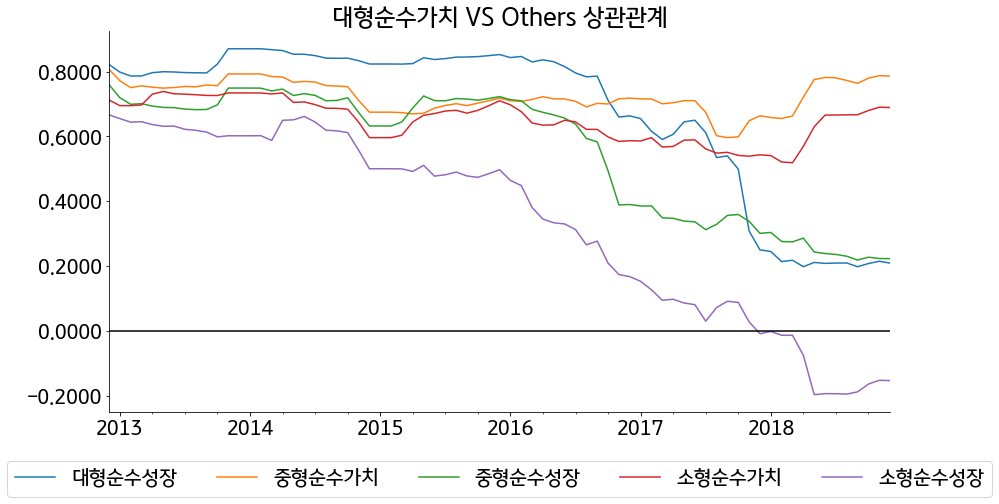

In [91]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.4f}'.format(y)))

for style in lower_style_ex_lar_pval:
    (mon_ex_lar_p_val_rt[style].rolling(60).corr(mon_lar_p_val_rt).dropna().rename(style)).plot(ax=ax, legend=True)

ax.legend(bbox_to_anchor=(0., -0, 1., -.102), ncol = 5, loc = "upper center")  
ax.set_title('대형순수가치 VS Others 상관관계')
ax.axhline(color='black')
ax.set_xlabel(None)

Text(0.5, 0, '')

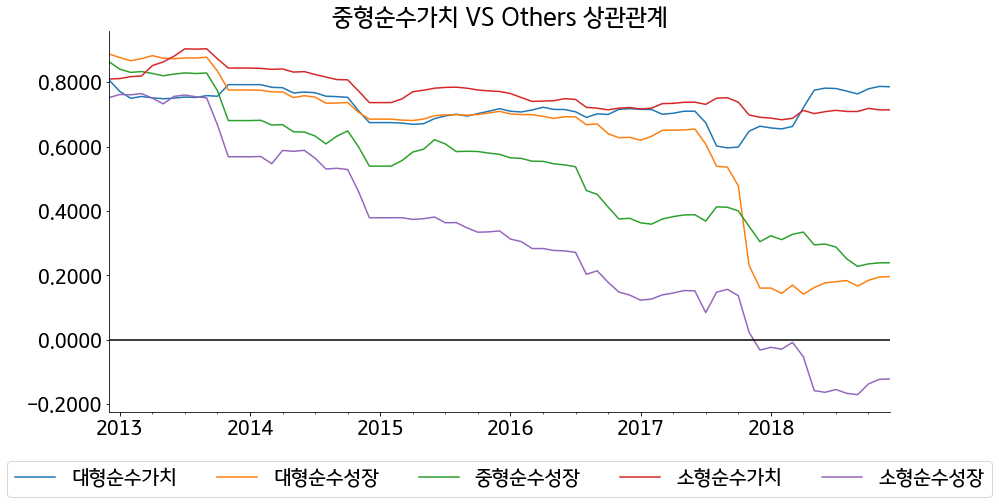

In [92]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.4f}'.format(y)))

for style in lower_style_ex_mid_pval:
    (mon_ex_mid_p_val_rt[style].rolling(60).corr(mon_mid_p_val_rt).dropna().rename(style)).plot(ax=ax, legend=True)

ax.legend(bbox_to_anchor=(0., -0, 1., -.102), ncol = 5, loc = "upper center")  
ax.set_title('중형순수가치 VS Others 상관관계')
ax.axhline(color='black')
ax.set_xlabel(None)